# Team Orienteering Problem on Single-column Aisle-graphs, Algorithm Demo 

A simple Graph display

In [1]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.
You should consider upgrading via the 'C:\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
from Graph import gen_random_aisle_graph
import pandas as pd

g = gen_random_aisle_graph(rows=12, cols=25, theta=2)
print(g)

0-3-2-1-3-4-1-1-1-1-2-8-5-6-1-1-3-1-4-1-1-2-1-4-1
|
0-1-1-1-2-1-3-1-5-1-100-1-1-1-1-1-3-3-2-2-1-1-1-1-1
|
0-1-2-5-1-2-3-3-1-18-1-2-1-2-1-2-3-1-1-3-4-1-1-1-1
|
0-1-1-2-2-1-2-1-1-1-1-3-1-1-1-61-1-1-3-3-1-2-2-1-5
|
0-1-1-1-1-1-1-1-1-1-1-2-1-8-1-1-2-1-8-1-1-59-20-1-1
|
0-1-1-1-1-3-1-2-1-1-1-1-1-1-1-2-1-2-1-60-1-1-1-4-5
|
0-1-1-2-2-1-1-1-4-1-1-1-5-1-3-1-14-21-2-1-1-2-1-1-1
|
0-1-2-1-3-1-1-1-2-1-1-2-1-3-1-1-1-1-1-9-1-8-5-1-2
|
0-2-1-2-1-1-9-1-2-1-2-1-1-1-2-1-1-1-3-1-1-1-1-1-1
|
0-1-1-1-1-4-1-1-22-1-3-6-2-1-1-41-3-2-1-1-58-1-1-2-36
|
0-2-1-1-1-1-28-1-62-1-1-1-1-3-1-2-1-4-2-1-1-3-2-6-1
|
0-1-2-5-1-2-1-2-3-1-1-1-1-1-1-1-4-30-1-6-2-2-1-1-5



Demo of Single agent case

In [3]:
from agents import Traverser
from Solution import Solution
budget = 400

t = Traverser(g, budget)
sol = t.GdyME()

print(sol.sum()/sol.total_reward())

0.8502673796791443


Example path of solution

In [4]:
#sol.path_schedule()

Demo of multi Agent algorithms

In [5]:
num_agents = 1
print('Multi Agent Strategy | Percentage of Reward Gathered:')
print('-----------------------------------------------------')
# sectioning
t = Traverser(g, budget)
sols = t.sectioning(num_agents)
t_sol = Solution(g)
for sol in sols:
    for node in sol.nodes:
        t_sol.nodes.add(node)
t_sol.path_schedule()
print('Sectioning           |',t_sol.sum()/t_sol.total_reward())
# series
t = Traverser(g, budget)
sols = t.series(num_agents)
t_sol = Solution(g)
for sol in sols:
    for node in sol.nodes:
        t_sol.nodes.add(node)
t_sol.path_schedule()
print('Series               |', t_sol.sum()/t_sol.total_reward())

# parallel
t = Traverser(g, budget)
sols = t.parallel(num_agents)
t_sol = Solution(g)
for sol in sols:
    for node in sol.nodes:
        t_sol.nodes.add(node)
t_sol.path_schedule()
print('Parallel             |', t_sol.sum()/t_sol.total_reward())

Multi Agent Strategy | Percentage of Reward Gathered:
-----------------------------------------------------
Sectioning           | 0.8092691622103387
Series               | 0.8092691622103387
Parallel             | 0.8092691622103387


Paths taken by the agents

# Simulations

In [6]:
# Benchmark configuration
ROWS = [25,12]
COLS = [12,25]
THETA = 2
NUM_SIMULATIONS = 10

budgets = [200,300,400,500,600]

num_agents = [2,3,4,5,6]




        


In [7]:
from Solution import combine

iteration = 0
outOf = len(ROWS) * len(budgets) * NUM_SIMULATIONS * len(num_agents)
for i in range(len(ROWS)):
    rows = ROWS[i]
    cols = COLS[i]
    gdy_me_r = {}
    gdy_me_c = {}
    gdy_mc_r = {}
    gdy_mc_c = {}
    section_r = {}
    section_c = {}
    series_r = {}
    series_c = {}
    parallel_r = {}
    parallel_c = {}
    for budget in budgets:
        print('progress:{}/{}'.format(iteration, outOf))
        gdy_me_r[budget] = [0]
        gdy_me_c[budget] = [0]
        gdy_mc_r[budget] = [0]
        gdy_mc_c[budget] = [0]
        section_r[budget] = []
        section_c[budget] = []
        series_r[budget] = []
        series_c[budget] = []
        parallel_r[budget] = []
        parallel_c[budget] = []

        rewards_sect = {}
        cost_sect = {}
        rewards_ser = {}
        cost_ser = {}
        rewards_par = {}
        cost_par = {}
        for s in range(NUM_SIMULATIONS):
            g = gen_random_aisle_graph(rows=rows, cols=cols, theta=THETA)
            # run single agent algorithms 
            
            # Gdy ME
            t_me = Traverser(g, budget)
            sol_me = t_me.GdyME()
            gdy_me_r[budget][0] += sol_me.sum()/sol_me.total_reward()
            gdy_me_c[budget][0] += len(sol_me.path_schedule())
            # Gdy MC
            t_mc = Traverser(g, budget)
            sol_mc = t_mc.GdyMC()
            gdy_mc_r[budget][0] += sol_mc.sum()/sol_mc.total_reward()
            gdy_mc_c[budget][0] += len(sol_mc.path_schedule())

            # run multi agent algorithms
            for n in num_agents:

                # Sectioning
                t_sect = Traverser(g, budget)
                sols_sect = t_sect.sectioning(n)
                sol_sect = combine(sols_sect, g)
                if n in rewards_sect.keys():
                    rewards_sect[n] += sol_sect.sum()/sol_sect.total_reward()
                else:
                    rewards_sect[n] = sol_sect.sum()/sol_sect.total_reward()
                paths_lens = [len(sol.path_schedule()) for sol in sols_sect]
                if n in cost_sect.keys():
                    cost_sect[n] += max(paths_lens)
                else:
                    cost_sect[n] = max(paths_lens)

                # Series
                t_ser = Traverser(g, budget)
                sols_ser = t_ser.series(n)
                sol_ser = combine(sols_ser, g)
                if n in rewards_ser.keys():
                    rewards_ser[n] += sol_ser.sum()/sol_ser.total_reward()
                else:
                    rewards_ser[n] = sol_ser.sum()/sol_ser.total_reward()
                paths_lens = [sol.path_schedule() for sol in sols_ser]
                if n in cost_ser.keys():
                    cost_ser[n] += max(paths_lens)
                else:
                    cost_ser[n] = max(paths_lens)

                # Parallel
                t_par = Traverser(g, budget)
                sols_par = t_par.parallel(n)
                sol_par = combine(sols_par, g)
                if n in rewards_par.keys():
                    rewards_par[n] += sol_par.sum()/sol_par.total_reward()
                else:
                    rewards_par[n] = sol_par.sum()/sol_par.total_reward()
                paths_lens = [sol.path_schedule() for sol in sols_par]
                if n in cost_par.keys():
                    cost_par[n] += max(paths_lens)
                else:
                    cost_par[n] = max(paths_lens)


                # progress
                iteration +=1
                
        gdy_me_r[budget][0] = gdy_me_r[budget][0]/NUM_SIMULATIONS
        gdy_me_c[budget][0] = gdy_mc_c[budget][0]/NUM_SIMULATIONS
        gdy_mc_r[budget][0] = gdy_mc_r[budget][0]/NUM_SIMULATIONS
        gdy_me_c[budget][0] = gdy_mc_c[budget][0]/NUM_SIMULATIONS
        for n in num_agents:
            rewards_sect[n] = rewards_sect[n]/NUM_SIMULATIONS
            cost_sect[n] = cost_sect[n]/NUM_SIMULATIONS
            rewards_ser[n] = rewards_ser[n]/NUM_SIMULATIONS
            cost_ser[n] = cost_sect[n]/NUM_SIMULATIONS
            rewards_par[n] = rewards_par[n]/NUM_SIMULATIONS
            cost_par[n] = cost_sect[n]/NUM_SIMULATIONS

            section_r[budget].append(rewards_sect[n])
            section_c[budget].append(cost_sect[n])
            series_r[budget].append(rewards_ser[n])
            series_c[budget].append(cost_ser[n])
            parallel_r[budget].append(rewards_par[n])
            parallel_c[budget].append(cost_par[n])

    df_gdy_me_r = pd.DataFrame(data=gdy_me_r)
    df_gdy_me_c = pd.DataFrame(data=gdy_me_c)
    df_gdy_mc_r = pd.DataFrame(data=gdy_mc_r)
    df_gdy_mc_c = pd.DataFrame(data=gdy_mc_c)
    df_section_r = pd.DataFrame(data=section_r)
    df_section_c = pd.DataFrame(data=section_c)
    df_series_r = pd.DataFrame(data=series_r)
    df_series_c = pd.DataFrame(data=series_c)
    df_parallel_r = pd.DataFrame(data=parallel_r)
    df_parallel_c = pd.DataFrame(data=parallel_c)

    df_gdy_me_r.to_csv('data/gdy_me_r_{}x{}.csv'.format(rows,cols))
    df_gdy_me_c.to_csv('data/gdy_me_c_{}x{}.csv'.format(rows,cols))
    df_gdy_mc_r.to_csv('data/gdy_mc_r_{}x{}.csv'.format(rows,cols))
    df_gdy_mc_c.to_csv('data/gdy_mc_c_{}x{}.csv'.format(rows,cols))
    df_section_r.to_csv('data/section_r_{}x{}.csv'.format(rows,cols))
    df_section_c.to_csv('data/section_c_{}x{}.csv'.format(rows,cols))
    df_series_r.to_csv('data/series_r_{}x{}.csv'.format(rows,cols))
    df_series_c.to_csv('data/series_c_{}x{}.csv'.format(rows,cols))
    df_parallel_r.to_csv('data/parallel_r_{}x{}.csv'.format(rows,cols))
    df_parallel_c.to_csv('data/parallel_c_{}x{}.csv'.format(rows,cols))

print('progress:{}/{} complete.'.format(iteration, outOf))


progress:0/500


NameError: name 'gdy_mc' is not defined

# Visualization

In [131]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-whitegrid')

In [137]:
# read in data
rows_1 = ROWS[0]
cols_1 = COLS[0]
rows_2 = ROWS[1]
cols_2 = COLS[1]
# single-agent
#   gdy_me
gdy_me_r_12x25 = pd.read_csv('data/gdy_me_r_{}x{}.csv'.format(rows_1, cols_1))
gdy_me_c_12x25 = pd.read_csv('data/gdy_me_c_{}x{}.csv'.format(rows_1, cols_1))
gdy_me_r_25x12 = pd.read_csv('data/gdy_me_r_{}x{}.csv'.format(rows_2, cols_2))
gdy_me_c_25x12 = pd.read_csv('data/gdy_me_c_{}x{}.csv'.format(rows_2, cols_2))
#   gdy_mc
gdy_mc_r_12x25 = pd.read_csv('data/gdy_mc_r_{}x{}.csv'.format(rows_1, cols_1))
gdy_mc_c_12x25 = pd.read_csv('data/gdy_mc_c_{}x{}.csv'.format(rows_1, cols_1))
gdy_mc_r_25x12 = pd.read_csv('data/gdy_mc_r_{}x{}.csv'.format(rows_2, cols_2))
gdy_mc_c_25x12 = pd.read_csv('data/gdy_mc_c_{}x{}.csv'.format(rows_2, cols_2))

# multi-agent
#   sectioning
section_r_12x25 = pd.read_csv('data/section_r_{}x{}.csv'.format(rows_1, cols_1))
section_c_12x25 = pd.read_csv('data/section_c_{}x{}.csv'.format(rows_1, cols_1))
section_r_25x12 = pd.read_csv('data/section_r_{}x{}.csv'.format(rows_2, cols_2))
section_c_25x12 = pd.read_csv('data/section_c_{}x{}.csv'.format(rows_2, cols_2))
#   series
series_r_12x25 = pd.read_csv('data/series_r_{}x{}.csv'.format(rows_1, cols_1))
series_c_12x25 = pd.read_csv('data/series_c_{}x{}.csv'.format(rows_1, cols_1))
series_r_25x12 = pd.read_csv('data/series_r_{}x{}.csv'.format(rows_2, cols_2))
series_c_25x12 = pd.read_csv('data/series_c_{}x{}.csv'.format(rows_2, cols_2))
#   parallel
parallel_r_12x25 = pd.read_csv('data/parallel_r_{}x{}.csv'.format(rows_1, cols_1))
parallel_c_12x25 = pd.read_csv('data/parallel_c_{}x{}.csv'.format(rows_1, cols_1))
parallel_r_25x12 = pd.read_csv('data/parallel_r_{}x{}.csv'.format(rows_2, cols_2))
parallel_c_25x12 = pd.read_csv('data/parallel_c_{}x{}.csv'.format(rows_2, cols_2))

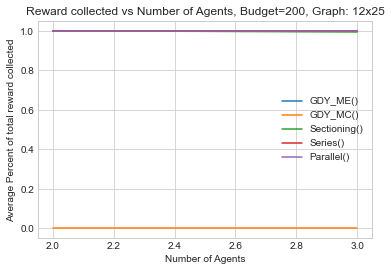

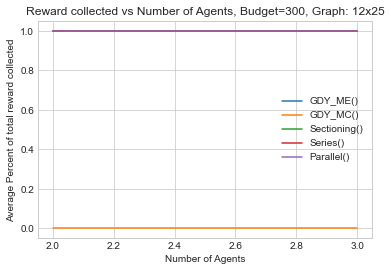

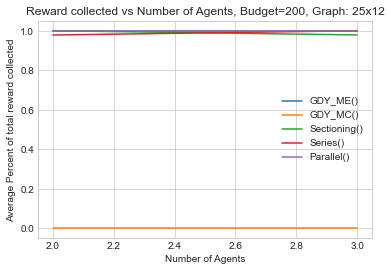

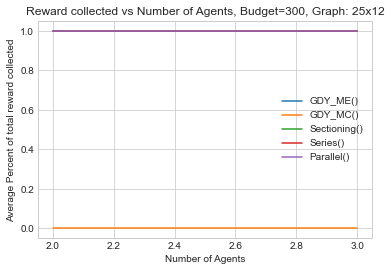

In [141]:
# Reward graphs
# 12X25 graph
for budget in budgets:
    # get the single agent values for this budget
    y_gdy_me = np.ones(len(num_agents))*gdy_me_r_12x25[str(budget)][0]
    y_gdy_mc = np.ones(len(num_agents))*gdy_mc_r_12x25[str(budget)][0]

    # get the multi agent values for this budget
    y_section = np.array(section_r_12x25[str(budget)])
    y_series = np.array(series_r_12x25[str(budget)])
    y_parallel = np.array(parallel_r_12x25[str(budget)])

    x = num_agents
    fig = plt.figure()
    ax = plt.axes()
    ax.set_title('Reward collected vs Number of Agents, Budget={}, Graph: 12x25'.format(budget))
    ax.set_xlabel('Number of Agents')
    ax.set_ylabel('Average Percent of total reward collected')
    # ax.set_xticklabels(x)
    ax.plot(x, y_gdy_me, label='GDY_ME()')
    ax.plot(x, y_gdy_mc, label='GDY_MC()')
    ax.plot(x, y_section, label='Sectioning()')
    ax.plot(x, y_series, label='Series()')
    ax.plot(x, y_parallel, label='Parallel()')
    ax.legend()
    fig.savefig('figures/Reward_12x25_Budget{}'.format(budget))

# 25x12 graph
for budget in budgets:
    # get the single agent values for this budget
    y_gdy_me = np.ones(len(num_agents))*gdy_me_r_25x12[str(budget)][0]
    y_gdy_mc = np.ones(len(num_agents))*gdy_mc_r_25x12[str(budget)][0]

    # get the multi agent values for this budget
    y_section = np.array(section_r_25x12[str(budget)])
    y_series = np.array(series_r_25x12[str(budget)])
    y_parallel = np.array(parallel_r_25x12[str(budget)])

    x = num_agents
    fig = plt.figure()
    ax = plt.axes()
    ax.set_title('Reward collected vs Number of Agents, Budget={}, Graph: 25x12'.format(budget))
    ax.set_xlabel('Number of Agents')
    ax.set_ylabel('Average Percent of total reward collected')
    # ax.set_xticklabels(x)
    ax.plot(x, y_gdy_me, label='GDY_ME()')
    ax.plot(x, y_gdy_mc, label='GDY_MC()')
    ax.plot(x, y_section, label='Sectioning()')
    ax.plot(x, y_series, label='Series()')
    ax.plot(x, y_parallel, label='Parallel()')
    ax.legend()
    fig.savefig('figures/Reward_25x12_Budget{}'.format(budget))


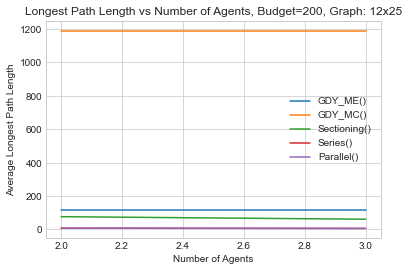

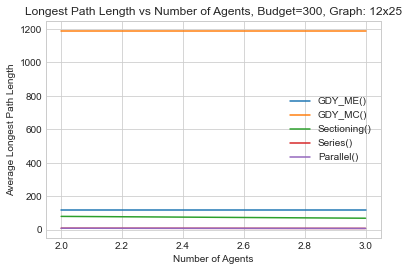

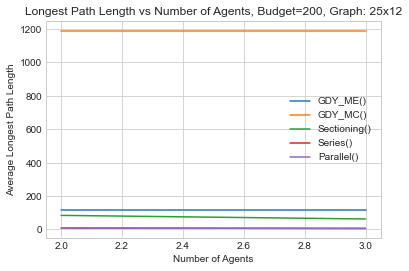

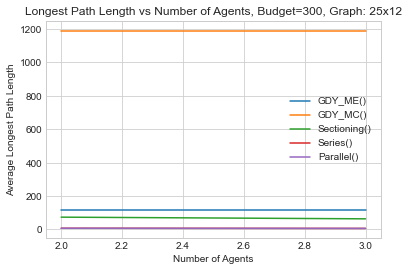

In [143]:
# Cost graphs
# 12X25 graph
for budget in budgets:
    # get the single agent values for this budget
    y_gdy_me = np.ones(len(num_agents))*gdy_me_c_12x25[str(budget)][0]
    y_gdy_mc = np.ones(len(num_agents))*gdy_mc_c_12x25[str(budget)][0]

    # get the multi agent values for this budget
    y_section = np.array(section_c_12x25[str(budget)])
    y_series = np.array(series_c_12x25[str(budget)])
    y_parallel = np.array(parallel_c_12x25[str(budget)])

    x = num_agents
    fig = plt.figure()
    ax = plt.axes()
    ax.set_title('Longest Path Length vs Number of Agents, Budget={}, Graph: 12x25'.format(budget))
    ax.set_xlabel('Number of Agents')
    ax.set_ylabel('Average Longest Path Length')
    # ax.set_xticklabels(x)
    ax.plot(x, y_gdy_me, label='GDY_ME()')
    ax.plot(x, y_gdy_mc, label='GDY_MC()')
    ax.plot(x, y_section, label='Sectioning()')
    ax.plot(x, y_series, label='Series()')
    ax.plot(x, y_parallel, label='Parallel()')
    ax.legend()
    fig.savefig('figures/Cost_12x25_Budget{}'.format(budget))

# 25x12 graph
for budget in budgets:
    # get the single agent values for this budget
    y_gdy_me = np.ones(len(num_agents))*gdy_me_c_25x12[str(budget)][0]
    y_gdy_mc = np.ones(len(num_agents))*gdy_mc_c_25x12[str(budget)][0]

    # get the multi agent values for this budget
    y_section = np.array(section_c_25x12[str(budget)])
    y_series = np.array(series_c_25x12[str(budget)])
    y_parallel = np.array(parallel_c_25x12[str(budget)])

    x = num_agents
    fig = plt.figure()
    ax = plt.axes()
    ax.set_title('Longest Path Length vs Number of Agents, Budget={}, Graph: 25x12'.format(budget))
    ax.set_xlabel('Number of Agents')
    ax.set_ylabel('Average Longest Path Length')
    # ax.set_xticklabels(x)
    ax.plot(x, y_gdy_me, label='GDY_ME()')
    ax.plot(x, y_gdy_mc, label='GDY_MC()')
    ax.plot(x, y_section, label='Sectioning()')
    ax.plot(x, y_series, label='Series()')
    ax.plot(x, y_parallel, label='Parallel()')
    ax.legend()
    fig.savefig('figures/Cost_25x12_Budget{}'.format(budget))

In [135]:
x = np.linspace(0, 2 * np.pi, 10)
y = np.sin(x ** 2)
x,y

(array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
        3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531]),
 array([ 0.        ,  0.46831952,  0.92912565, -0.94736356,  0.99844494,
        -0.37247437, -0.96451297, -0.94921629, -0.22125653,  0.97834055]))